# PCA Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ama_tlbx.data import LifeExpectancyDataset, LECol
from ama_tlbx.plotting import (
    plot_explained_variance,
    plot_loadings_heatmap,
    plot_biplot_plotly,
)

np.random.seed(42)

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.titlesize"] = 12
plt.rcParams["figure.labelsize"] = 11
plt.rcParams["figure.titleweight"] = "bold"


In [2]:
# Load dataset and fit PCA (standardized, exclude target)
le_ds = LifeExpectancyDataset.from_csv(aggregate_by_country=False)
pca_result = (
    le_ds.make_pca_analyzer(standardized=True, exclude_target=True)
    .fit(n_components=None)
    .result()
)


/var/folders/tq/w_yq51q901g31lqy10hn7b000000gn/T/ipykernel_61061/3945976313.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


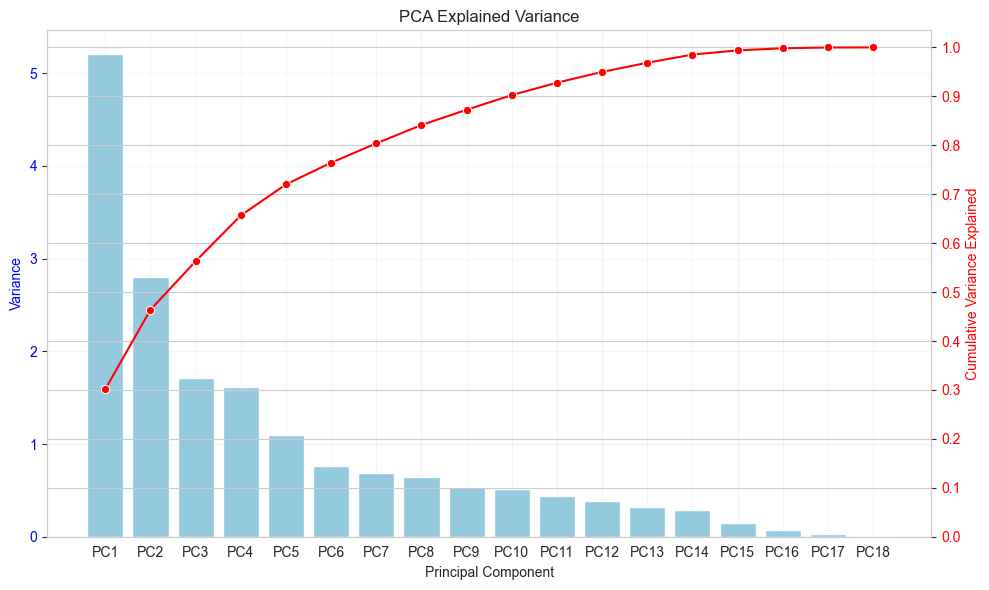

In [3]:
# Explained variance
fig = plot_explained_variance(pca_result)
fig.show()


/var/folders/tq/w_yq51q901g31lqy10hn7b000000gn/T/ipykernel_61061/2038699058.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


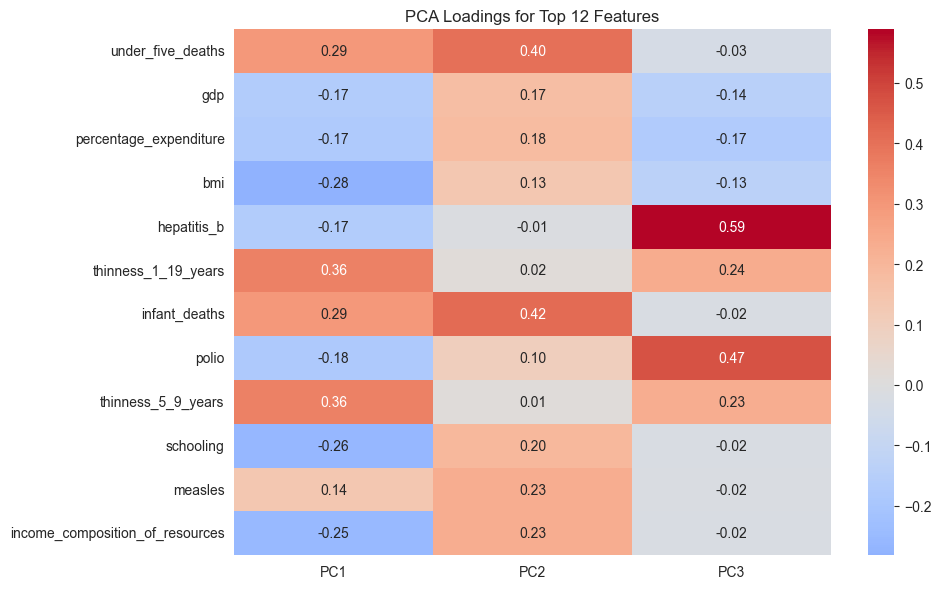

In [4]:
# Loadings heatmap (top 12 features over first 3 PCs)
fig = plot_loadings_heatmap(
    pca_result, n_components=3, top_n_features=12, figsize=(10, 6)
)
fig.show()


In [5]:
hover = LifeExpectancyDataset(
    df=le_ds.df[[LECol.COUNTRY, LECol.YEAR]]
).df_pretty.assign(Year=lambda df: df.Year.dt.year)
hover


,Country,Year
0,Afghanistan,2015
1,Afghanistan,2014
2,Afghanistan,2013
3,Afghanistan,2012
4,Afghanistan,2011
...,...,...
2933,Zimbabwe,2004
2934,Zimbabwe,2003
2935,Zimbabwe,2002
2936,Zimbabwe,2001


In [ ]:
fig = plot_biplot_plotly(
    pca_result,
    dims=2,
    top_features=10,
    color=le_ds.df[LECol.TARGET],
    hover_metadata=hover,
)
fig.show()


In [7]:
fig = plot_biplot_plotly(
    pca_result,
    dims=3,
    top_features=10,
    color=le_ds.df[LECol.TARGET],
    hover_metadata=hover,
)
fig
